In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\Logistic Regression\Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\Logistic Regression\Titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.set_index("PassengerId",inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.mode().head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S


In [8]:
number=data.select_dtypes(include="number")
number

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


In [9]:
object=data.select_dtypes(include="object").drop(["Name","Ticket","Cabin"],axis=1)
object

,Sex,Embarked
PassengerId,,
1,male,S
2,female,C
3,female,S
4,female,S
5,male,S
...,...,...
887,male,S
888,female,S
889,female,S


In [10]:
test[['Sex','Embarked',]]=test[['Sex','Embarked']].astype("category")

In [11]:
data[['Sex','Embarked',]]=data[['Sex','Embarked']].astype("category")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(2), float64(2), int64(4), object(3)
memory usage: 71.6+ KB


In [13]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
import matplotlib.pyplot as plt

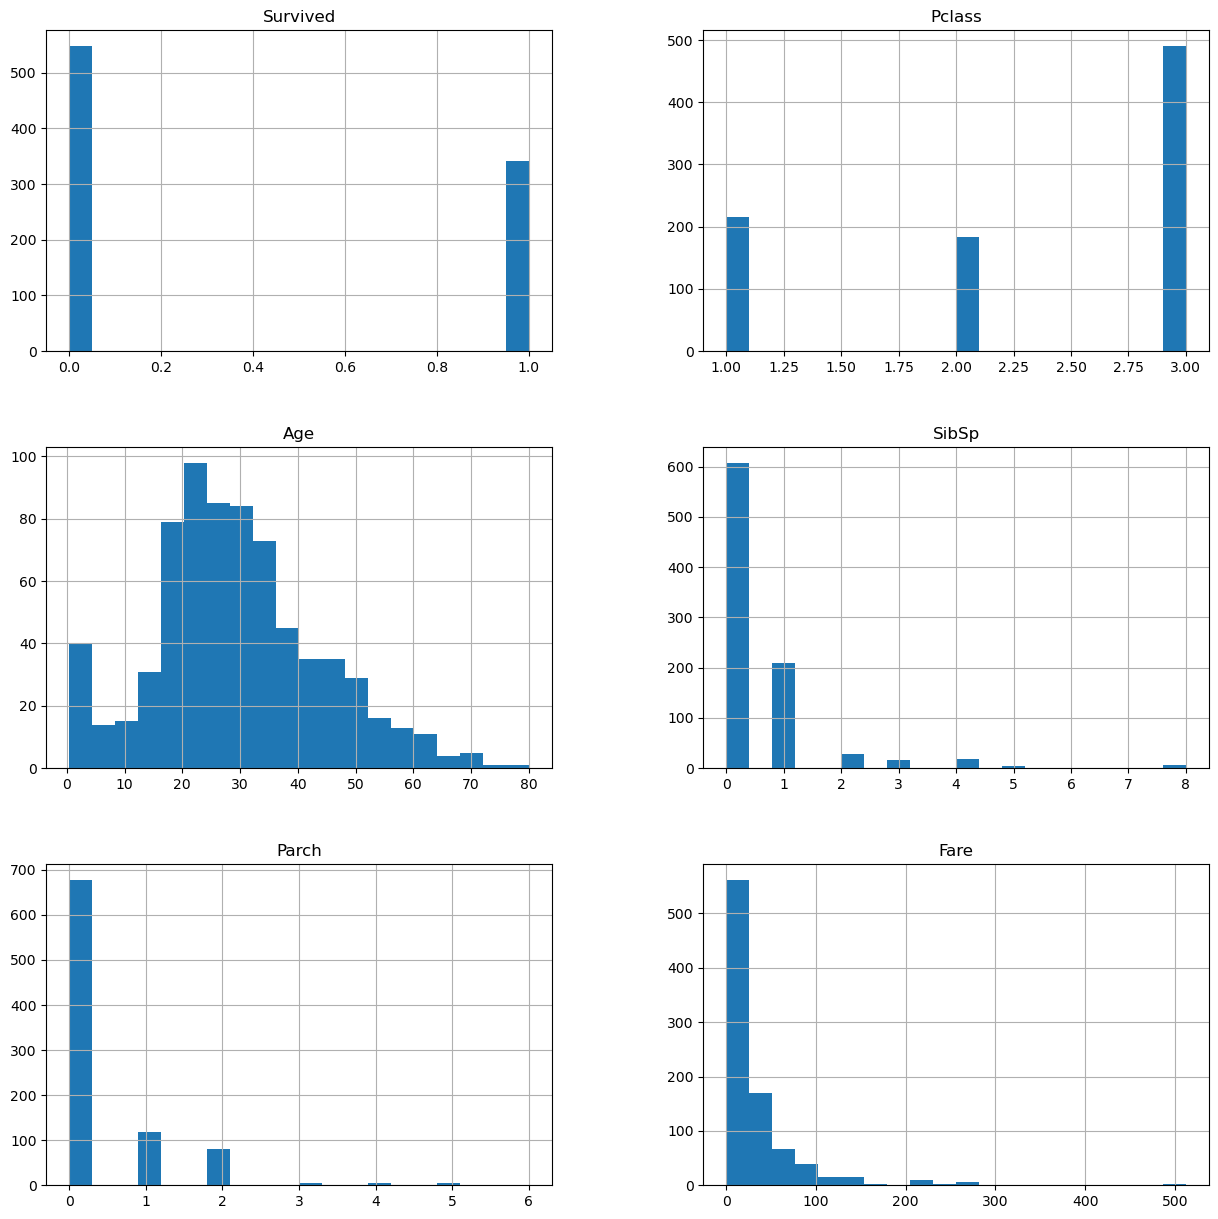

<Figure size 640x480 with 0 Axes>

In [15]:
number.hist(bins=20,figsize=(15,15))
plt.show()
plt.tight_layout()

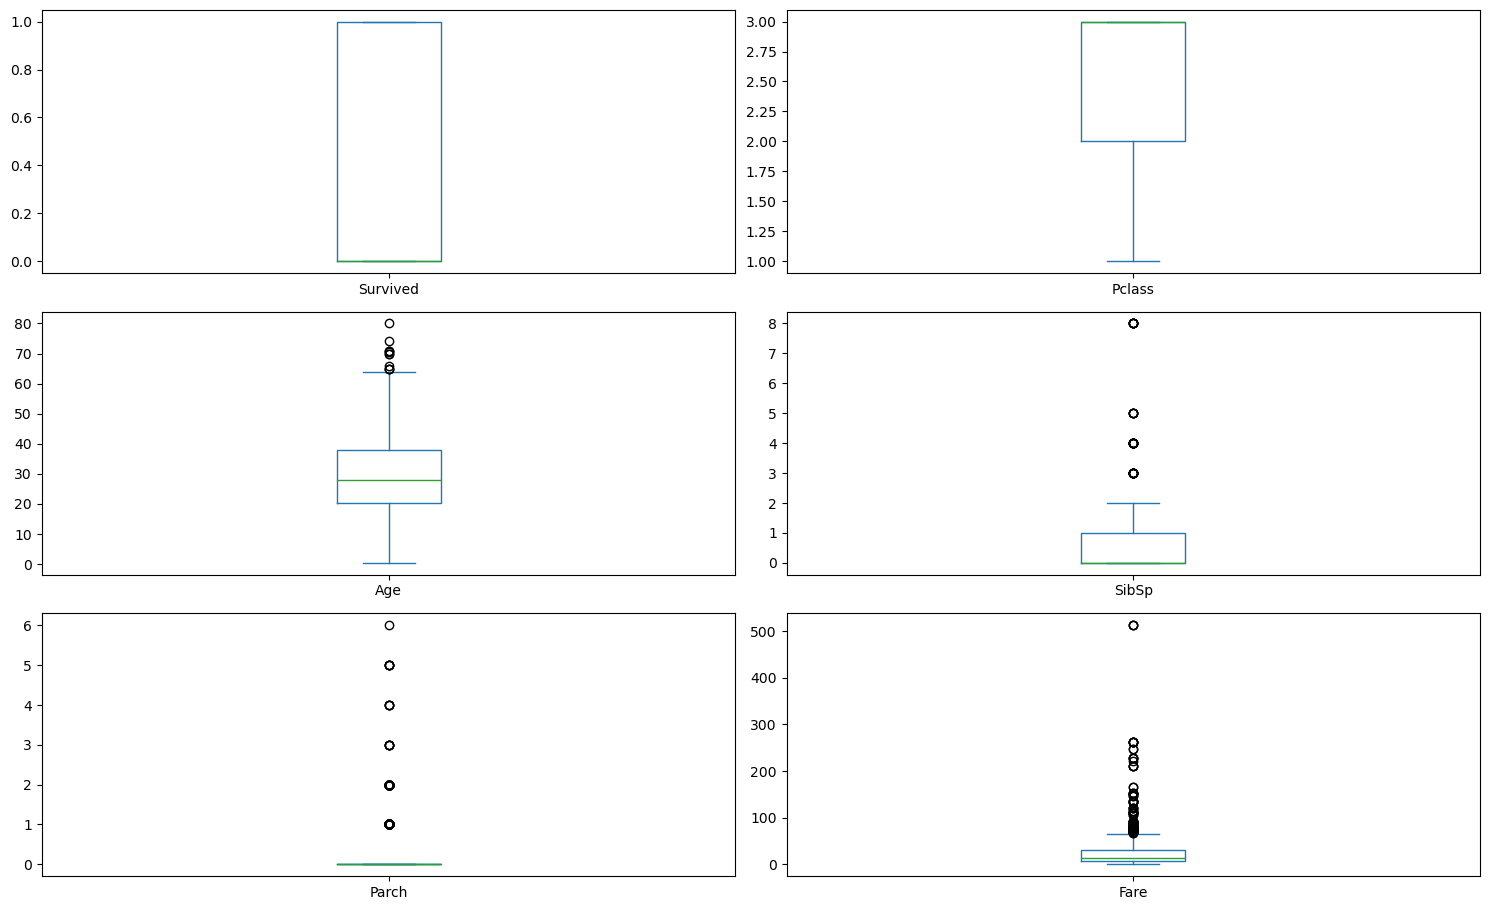

In [16]:

number.plot(kind="box",subplots=True,layout=(5,2),figsize=(15,15))
plt.tight_layout()
plt.show()

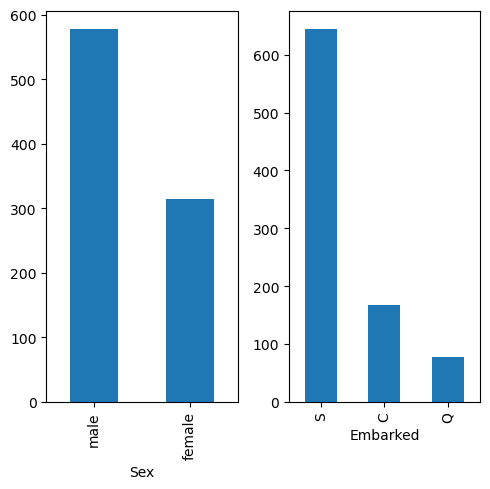

In [17]:
i=1
plt.figure(figsize=(5,5))
for col in object:
    plt.subplot(1,2,i)
    data[col].value_counts().plot(kind="bar",)
    i+=1
plt.tight_layout()
plt.show()


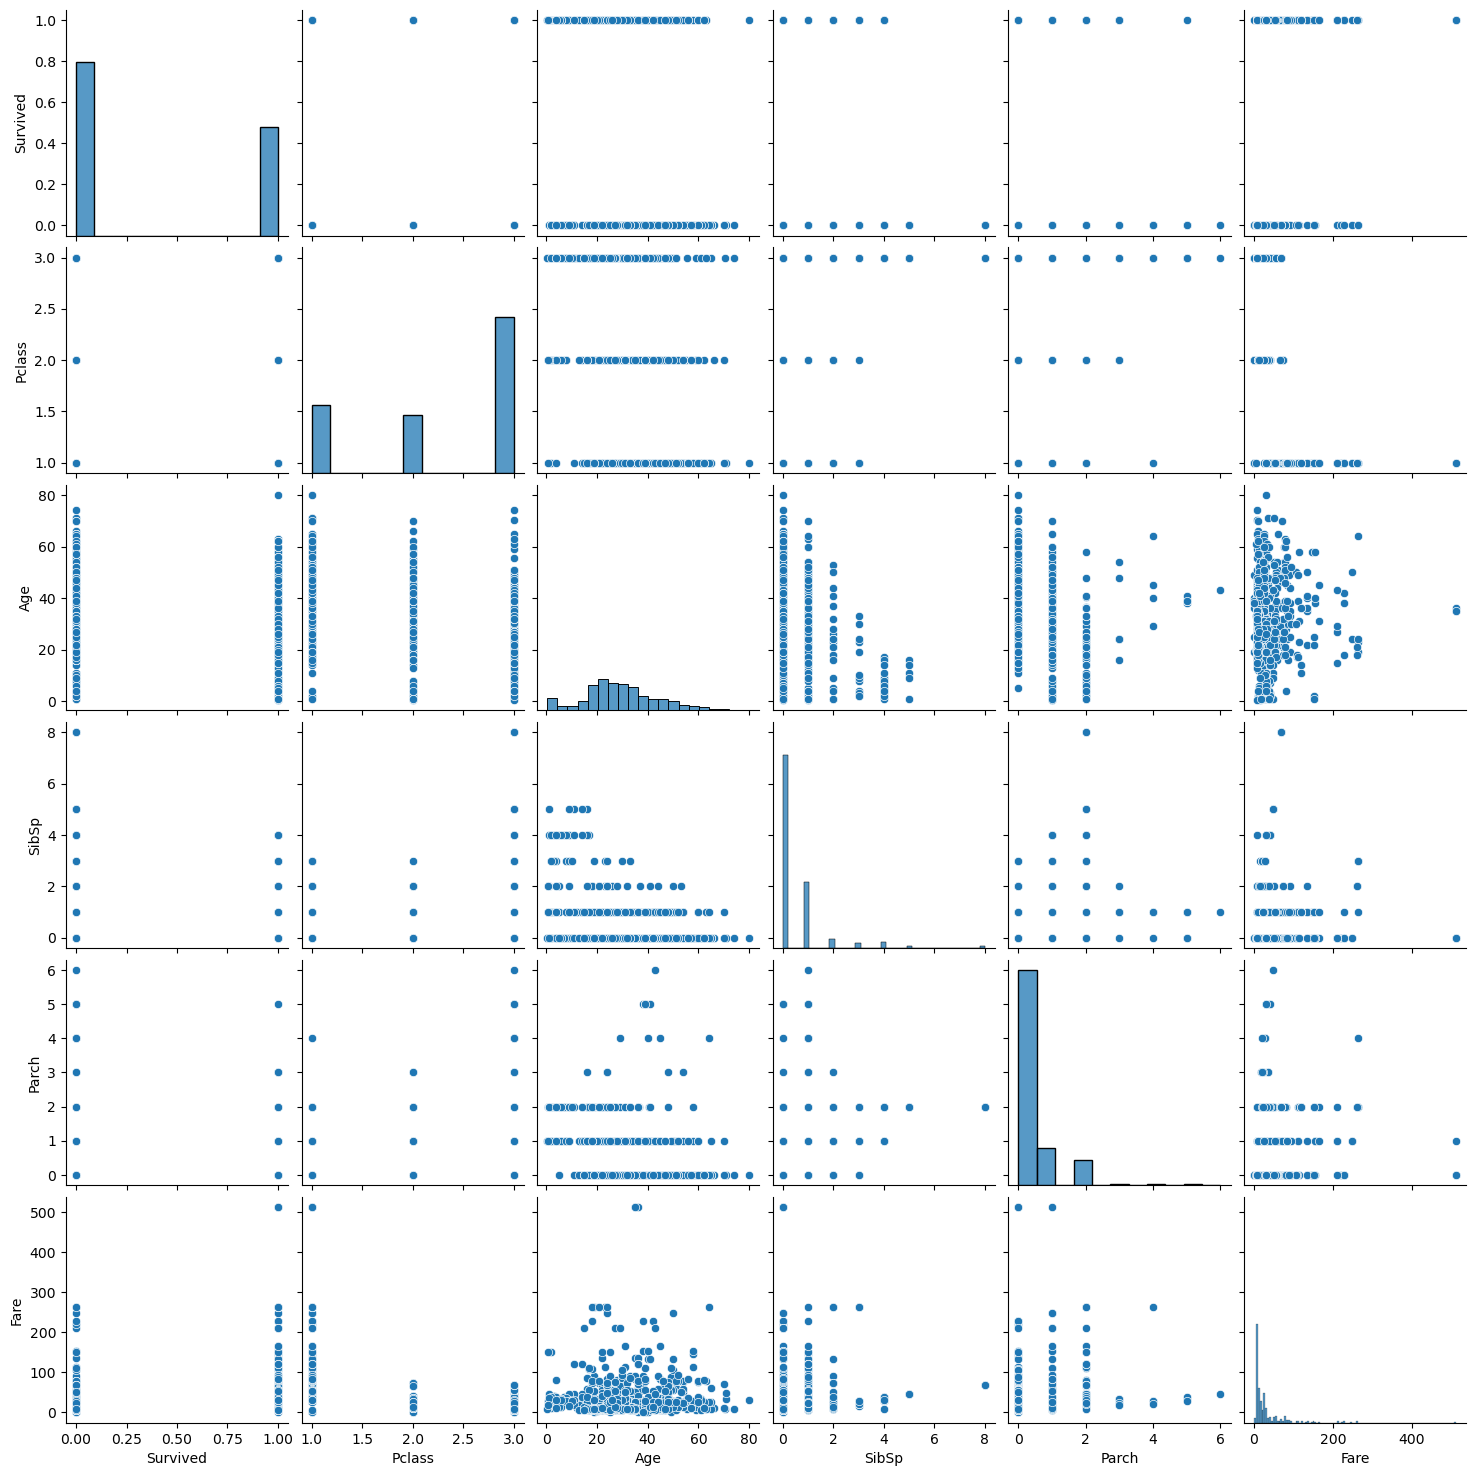

In [18]:
import seaborn as sns
sns.pairplot(data)
plt.show()

In [19]:
mode=data["Embarked"].mode().iloc[0]
mode

'S'

In [20]:
data["Embarked"]=data["Embarked"].fillna(mode)

In [21]:
test["Embarked"]=test["Embarked"].fillna(mode)

In [22]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [23]:
data["Age"]=data["Age"].fillna(data.Age.median())

In [24]:
test["Age"]=test["Age"].fillna(data.Age.median())

In [25]:
test["Fare"]=test["Fare"].fillna(data.Age.median())

In [26]:
data["Cabin"]=data["Cabin"].fillna("Unknown")

In [27]:
test["Cabin"]=test["Cabin"].fillna("Unknown")

In [28]:
data['Deck']=data['Cabin'].apply(lambda x:x[0] if x!='Unknown' else 'U')

In [29]:
test['Deck']=test['Cabin'].apply(lambda x:x[0] if x!='Unknown' else 'U')

In [30]:
data["Deck"]=data["Deck"].astype("category")

In [31]:
test["Deck"]=test["Deck"].astype("category")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     891 non-null    object  
 10  Embarked  891 non-null    category
 11  Deck      891 non-null    category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 72.8+ KB


In [33]:
data['Cabin_missing']=(data['Cabin']=='Unknown').astype('int')

In [34]:
test['Cabin_missing']=(test['Cabin']=='Unknown').astype('int')

In [35]:
data.drop("Cabin",axis=1,inplace=True)

In [36]:
test.drop("Cabin",axis=1,inplace=True)

In [37]:
data.drop(["Name","Ticket"],axis=1,inplace=True)

In [38]:
test.drop(["Name","Ticket"],axis=1,inplace=True)

In [39]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Cabin_missing
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,U,1
2,1,1,female,38.0,1,0,71.2833,C,C,0
3,1,3,female,26.0,0,0,7.9250,S,U,1
4,1,1,female,35.0,1,0,53.1000,S,C,0
5,0,3,male,35.0,0,0,8.0500,S,U,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,U,1
888,1,1,female,19.0,0,0,30.0000,S,B,0
889,0,3,female,28.0,1,2,23.4500,S,U,1


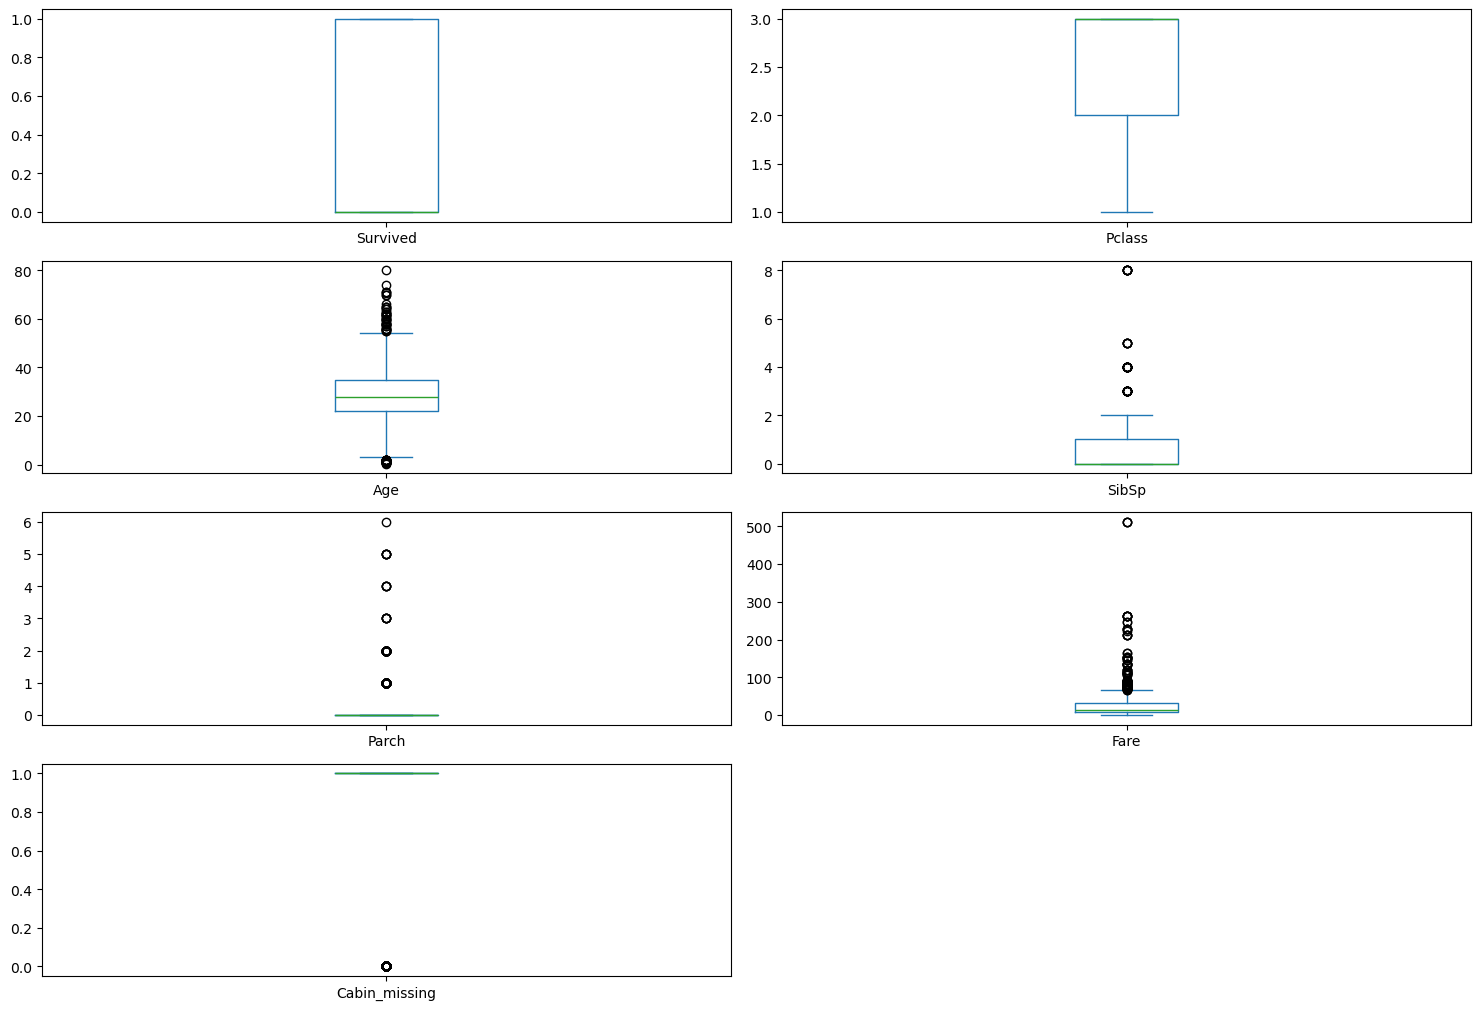

In [40]:
data.plot(kind="box",subplots=True,layout=(6,2),figsize=(15,15))
plt.tight_layout()
plt.show()

In [41]:
for col in number.drop(["Survived","Pclass"],axis=1) :
    print(col)

Age
SibSp
Parch
Fare


In [42]:
Q1={}
Q3={}
IQR={}
UE={}
LE={}
for col in number.drop(["Survived","Pclass"],axis=1):
    Q1[col]=data[col].quantile(0.25)
    Q3[col]=data[col].quantile(0.75)
    IQR[col]=Q3[col]-Q1[col]
    UE[col]=Q3[col]+1.5*IQR[col]
    LE[col]=Q1[col]-1.5*IQR[col]

In [43]:
Q1_={}
Q3_={}
IQR_={}
UE_={}
LE_={}
for col in number.drop(["Survived","Pclass"],axis=1):
    Q1_[col]=test[col].quantile(0.25)
    Q3_[col]=test[col].quantile(0.75)
    IQR_[col]=Q3_[col]-Q1_[col]
    UE_[col]=Q3_[col]+1.5*IQR_[col]
    LE_[col]=Q1_[col]-1.5*IQR_[col]

In [44]:
data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [45]:
data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [46]:
data["SibSp"]=np.clip(data["SibSp"],0,4)

In [47]:
test["SibSp"]=np.clip(test["SibSp"],0,4)

In [48]:
data["Parch"]=np.clip(data["Parch"],0,4)

In [49]:
test["Parch"]=np.clip(test["Parch"],0,4)

In [50]:
df=pd.DataFrame([IQR,UE,LE,Q1,Q3],index=["IQR","UE","LE","Q1","Q3"])
df

,Age,SibSp,Parch,Fare
IQR,13.0,1.0,0.0,23.0896
UE,54.5,2.5,0.0,65.6344
LE,2.5,-1.5,0.0,-26.7240
Q1,22.0,0.0,0.0,7.9104
Q3,35.0,1.0,0.0,31.0000


In [51]:
df2=pd.DataFrame([IQR_,UE_,LE_,Q1_,Q3_],index=["IQR","UE","LE","Q1","Q3"])
df2

,Age,SibSp,Parch,Fare
IQR,12.750,1.0,0.0,23.576075
UE,54.875,2.5,0.0,66.835988
LE,3.875,-1.5,0.0,-27.468312
Q1,23.000,0.0,0.0,7.895800
Q3,35.750,1.0,0.0,31.471875


In [52]:
data.loc[data.Age<2.5,"Age"]=2.5

In [53]:
test.loc[test.Age<3.8,"Age"]=3.8

In [54]:
data.loc[data.Age>54.5,"Age"]=54.5

In [55]:
test.loc[test.Age>54.5,"Age"]=54.5

In [56]:
data.loc[data.Fare>65.62,"Fare"]=65.62

In [57]:
test.loc[test.Fare>66.9,"Fare"]=66.9

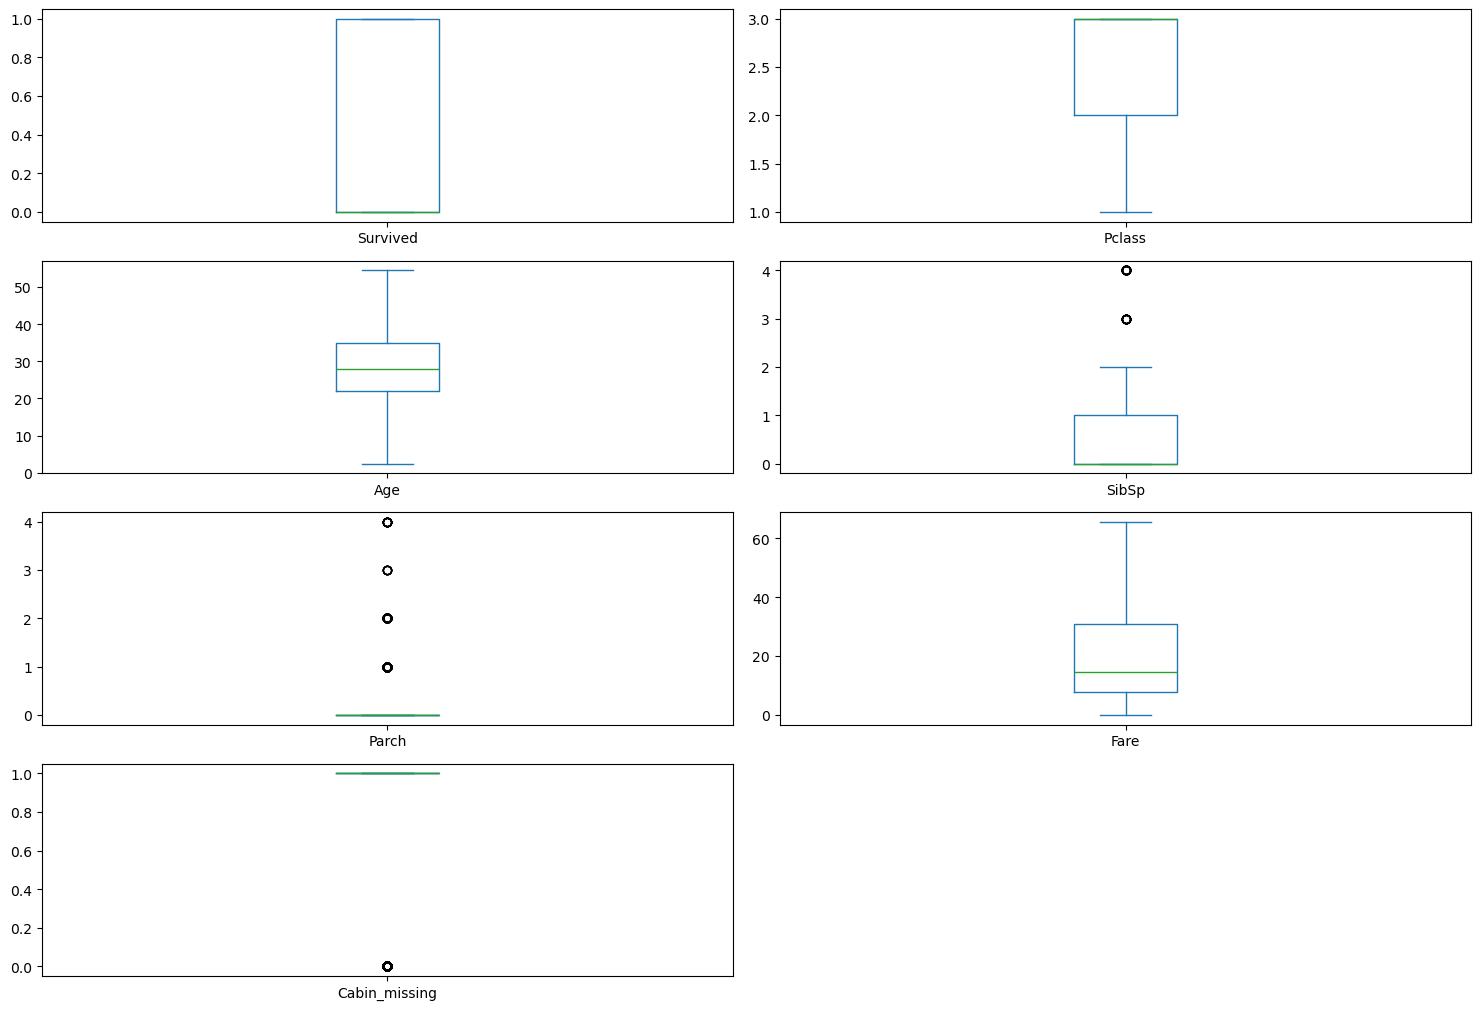

In [58]:
data.plot(kind="box",subplots=True,layout=(6,2),figsize=(15,15))
plt.tight_layout()
plt.show()

In [59]:
#final_data.isnull().sum()

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data[['Age','Fare']]=ss.fit_transform(data[['Age','Fare']])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Cabin_missing
PassengerId,,,,,,,,,,
1,0,3,male,-0.583432,1,0,-0.820614,S,U,1
2,1,1,female,0.742685,1,0,2.031389,C,C,0
3,1,3,female,-0.251903,0,0,-0.787633,S,U,1
4,1,1,female,0.494038,1,0,1.419653,S,C,0
5,0,3,male,0.494038,0,0,-0.781525,S,U,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,-0.169020,0,0,-0.539664,S,U,1
888,1,1,female,-0.832079,0,0,0.290969,S,B,0
889,0,3,female,-0.086138,1,2,-0.029069,S,U,1


In [61]:
from sklearn.preprocessing import StandardScaler
ss1=StandardScaler()
test[['Age','Fare']]=ss1.fit_transform(test[['Age','Fare']])
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Cabin_missing
0,892,3,male,0.425074,0,0,-0.795862,Q,U,1
1,893,3,female,1.495596,1,0,-0.835013,S,U,1
2,894,2,male,2.137910,0,0,-0.708119,Q,U,1
3,895,3,male,-0.217239,0,0,-0.756516,S,U,1
4,896,3,female,-0.645448,1,1,-0.585357,S,U,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,-0.131597,0,0,-0.785436,S,U,1
414,1306,1,female,0.810462,0,0,1.993247,C,C,0
415,1307,3,male,0.767641,0,0,-0.823209,S,U,1
416,1308,3,male,-0.131597,0,0,-0.785436,S,U,1


In [62]:
from sklearn.preprocessing import  OneHotEncoder

In [63]:
one=OneHotEncoder(sparse_output=False)
one_data=one.fit_transform(data[['Sex','Embarked','Deck']])
one_data

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [64]:
one1=OneHotEncoder(sparse_output=False)
one_data1=one1.fit_transform(test[['Sex','Embarked','Deck']])
one_data1

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [65]:
one.get_feature_names_out()
one_df=pd.DataFrame(one_data,columns=one.get_feature_names_out(),index=data.index)

In [66]:
one1.get_feature_names_out()
one_df1=pd.DataFrame(one_data1,columns=one1.get_feature_names_out(),index=test.index)

In [67]:
final_data=pd.concat([data,one_df],axis=1)
final_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Cabin_missing,...,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,-0.583432,1,0,-0.820614,S,U,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,female,0.742685,1,0,2.031389,C,C,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,female,-0.251903,0,0,-0.787633,S,U,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,female,0.494038,1,0,1.419653,S,C,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,3,male,0.494038,0,0,-0.781525,S,U,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,-0.169020,0,0,-0.539664,S,U,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,1,1,female,-0.832079,0,0,0.290969,S,B,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0,3,female,-0.086138,1,2,-0.029069,S,U,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
final_data1=pd.concat([test,one_df1],axis=1)
final_data1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Cabin_missing,...,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U
0,892,3,male,0.425074,0,0,-0.795862,Q,U,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,893,3,female,1.495596,1,0,-0.835013,S,U,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894,2,male,2.137910,0,0,-0.708119,Q,U,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,895,3,male,-0.217239,0,0,-0.756516,S,U,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,896,3,female,-0.645448,1,1,-0.585357,S,U,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,-0.131597,0,0,-0.785436,S,U,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,1306,1,female,0.810462,0,0,1.993247,C,C,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415,1307,3,male,0.767641,0,0,-0.823209,S,U,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,1308,3,male,-0.131597,0,0,-0.785436,S,U,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
final_data1.set_index("PassengerId",inplace=True)

In [70]:
final_data.drop(["Sex","Deck","Embarked"],axis=1,inplace=True)

In [71]:
final_data1.drop(["Sex","Deck","Embarked"],axis=1,inplace=True)

In [72]:
final_data1["Deck_T"]=final_data["Deck_T"]

In [73]:
final_data1["Deck_T"]=final_data1["Deck_T"].replace({np.nan:0})

In [74]:
final_data1["Deck_U1"]=final_data1["Deck_U"]

In [75]:
final_data1.drop("Deck_U",axis=1,inplace=True)

In [76]:
final_data1["Deck_U"]=final_data1["Deck_U1"]

In [77]:
final_data1.drop("Deck_U1",axis=1,inplace=True)

In [78]:
final_data1.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin_missing    0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Deck_A           0
Deck_B           0
Deck_C           0
Deck_D           0
Deck_E           0
Deck_F           0
Deck_G           0
Deck_T           0
Deck_U           0
dtype: int64

In [79]:
log=LogisticRegression(max_iter=1000)


In [80]:
x=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
log.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [84]:
log.score(x_test,y_test)

0.8156424581005587

In [85]:
y_pred=log.predict(x_test)

In [86]:
actual_pred=log.predict(final_data1)

In [87]:
actual_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [90]:
accuracy_score(y_test,y_pred)

0.8156424581005587

In [91]:
auc = roc_auc_score(y_test, y_pred)
auc

0.806949806949807

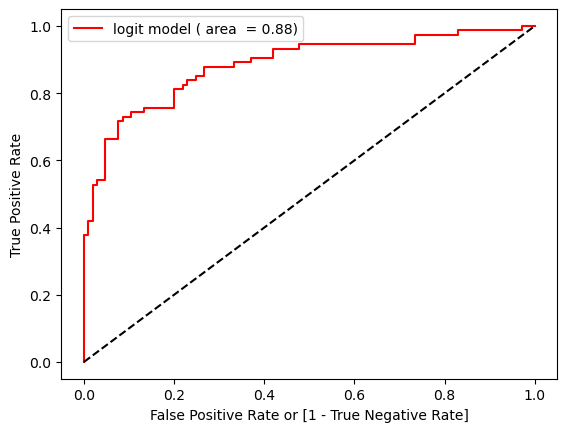

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test, log.predict_proba(x_test)[:, 1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()


In [93]:
log.coef_

array([[-0.7083629 , -0.43337404, -0.36345709, -0.14086639,  0.20411907,
        -0.23602088,  1.34605382, -1.33824881,  0.22285938,  0.03276869,
        -0.24782307, -0.36172867,  0.1429998 , -0.41917189,  0.38267202,
         0.96010412,  0.55922734, -0.71990385, -0.30037299, -0.23602088]])

In [94]:
log.intercept_

array([2.12334369])

In [ ]:
!pip install streamlit

In [ ]:
  #              http://localhost:8501/

# save  the code in the notepad open anaconda terminal  enter streamlit run paste the notepad path

# What is the difference between precision and recall?

In [ ]:
1. What is the difference between precision and recall?
Precision
Out of all the predicted positives, how many are actually positive?
Recall
Out of all the actual positives, how many did I correctly predict as positive?

In [ ]:
Cross-Validation

A method to evaluate model performance by splitting data into multiple parts (folds).

Model is trained on some folds and tested on the remaining fold, repeated several times.

Average score of all folds gives a reliable estimate of performance.